In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
#split data into 80%training data and 20%test data  
from sklearn.model_selection import train_test_split
recipes=pd.read_csv("recipes.csv")
X=recipes.drop('cuisine',axis=1)
y=recipes['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
X_train

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yams,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini
517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


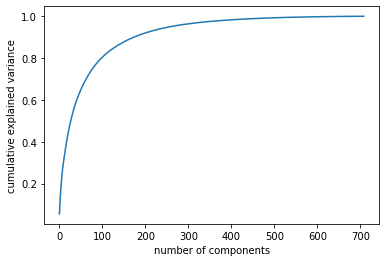

'\nFrom the curve, We see that the first 300 components contain approximately 90% of the\nvariance, which means that we could preserve about 90% of information when doing 300-dimensional projection.\nSo, in this section, we decided to apply the pca to make our data reduced to 300 dimension\n\n'

In [3]:
#Applying pca to achieve the data dimensionality
from sklearn.decomposition import PCA 
recipes_x=recipes.drop('cuisine',axis=1)
recipes_y=recipes['cuisine']
pca = PCA()
pca.fit(recipes_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig("fig5")
plt.show()
'''
From the curve, We see that the first 300 components contain approximately 90% of the
variance, which means that we could preserve about 90% of information when doing 300-dimensional projection.
So, in this section, we decided to apply the pca to make our data reduced to 300 dimension

'''



In [4]:
#Applying pca to make data reduced to 300 dimension
pca = PCA(n_components=300)
recipes_pca=pca.fit_transform(recipes_x)
recipes_pca=pd.DataFrame(recipes_pca)
#adding cuisine colunm into pca_data
recipes_pca['cuisine']=recipes['cuisine']
recipes_pca

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,cuisine
0,-1.567595,0.389052,0.795090,0.721691,0.887281,0.140546,0.142372,-0.069509,-0.167872,0.708768,...,-0.001288,0.042158,0.018830,-0.027601,-0.000268,0.004531,-0.001901,0.017050,0.022155,0
1,-1.276475,1.007507,0.339606,0.576669,0.823168,-0.191010,0.394905,0.126015,-0.327764,0.261932,...,-0.004043,0.013738,0.005870,0.013657,0.022108,-0.024354,0.029362,-0.011189,-0.005259,0
2,-1.024601,0.473328,-0.275657,-0.015167,0.706183,-0.256554,0.474937,-0.132516,-0.472440,0.198928,...,-0.007162,0.000326,-0.010422,0.011383,-0.009577,-0.009892,0.016753,-0.019683,0.012737,0
3,-0.367194,0.001263,1.130447,0.408815,0.073143,0.795556,-0.977310,0.406167,0.083477,0.653536,...,0.004039,-0.013912,-0.003972,0.008571,0.014244,-0.016193,0.004788,0.014429,-0.004247,0
4,-1.578960,1.308570,-0.022852,0.571230,0.791842,0.594584,-0.031528,-0.236335,0.690519,-0.128715,...,0.001313,-0.004244,0.006714,-0.004578,0.024432,-0.012253,0.012597,0.020262,0.021728,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,-0.720389,0.852054,0.558639,0.923879,0.454955,-0.542130,0.326175,-0.070541,-0.732156,0.442155,...,0.025425,0.045114,-0.012500,-0.004272,-0.006614,0.019787,-0.032304,0.003028,-0.005885,11
4232,-1.017191,0.584299,-0.290292,0.091154,0.420320,-0.419477,0.226188,0.832908,-0.029764,-0.494612,...,0.020983,0.039813,-0.027850,0.047165,-0.055907,-0.007695,-0.047919,0.012645,0.001566,11
4233,-0.448836,0.305731,0.442042,0.726141,0.124416,-0.769466,0.047449,0.756803,-0.441747,-0.356683,...,0.002443,0.010564,0.019248,-0.040220,0.013235,0.021225,0.001125,-0.000037,0.006659,11
4234,-0.941957,0.298657,-0.236522,-0.395368,-0.663061,-0.548923,0.200721,0.138186,-0.308641,-0.130342,...,-0.005163,0.015651,0.009956,0.002469,0.016386,0.003135,-0.002196,0.000193,-0.009111,11


In [5]:
#split data into 80%training data and 20%test data  
from sklearn.model_selection import train_test_split
X=recipes_pca.drop('cuisine',axis=1)
y=recipes_pca['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)


In [6]:
#Applying Logistic Regression to the tfidf data
from sklearn.linear_model import LogisticRegression
clf_LogisticRegression = LogisticRegression(solver='sag',multi_class='multinomial')
clf_LogisticRegression.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial', solver='sag')

In [7]:
#Represent model's results for the test accuracy, precision, recall and f1 score
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score,accuracy_score)
from sklearn.model_selection import cross_val_score
y_pred_LogisticRegression_test=clf_LogisticRegression.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_LogisticRegression_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_LogisticRegression_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_LogisticRegression_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_LogisticRegression_test, average="weighted"))
cv_scores_LogisticRegression = cross_val_score(clf_LogisticRegression, X, y, cv=5)
print("Test cv_score: ",cv_scores_LogisticRegression.mean())

Test Accuracy: 0.757075
Test Precision: 0.760348
Test Recall: 0.757075
Test F1: 0.757250

Test cv_score:  0.7651013009289167


In [8]:
#Represent model's results for the training accuracy, precision, recall and f1 score
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score,accuracy_score)
y_pred_LogisticRegression_train=clf_LogisticRegression.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_LogisticRegression_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_LogisticRegression_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_LogisticRegression_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_LogisticRegression_train, average="weighted"))


Train Accuracy: 0.889610
Train Precision: 0.889703
Train Recall: 0.889610
Train F1: 0.889467



In [9]:
#Support Vector Classifier
from sklearn.svm import SVC
clf_SVC = SVC(decision_function_shape='ovo',class_weight='balanced',probability=True)
clf_SVC.fit(X_train, y_train)

SVC(class_weight='balanced', decision_function_shape='ovo', probability=True)

In [10]:
y_pred_SVC_test=clf_SVC.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_SVC_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_SVC_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_SVC_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_SVC_test, average="weighted"))
cv_scores_SVC = cross_val_score(clf_SVC, X, y, cv=5)
print("Test cv_score: ",cv_scores_SVC.mean())

Test Accuracy: 0.750000
Test Precision: 0.759116
Test Recall: 0.750000
Test F1: 0.751716

Test cv_score:  0.7665155599117863


In [11]:
y_pred_SVC_train=clf_SVC.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_SVC_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_SVC_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_SVC_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_SVC_train, average="weighted"))

Train Accuracy: 0.935360
Train Precision: 0.936243
Train Recall: 0.935360
Train F1: 0.935553



In [12]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier  
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred_KNN_test=clf_KNN.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_KNN_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_KNN_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_KNN_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_KNN_test, average="weighted"))
cv_scores_KNN = cross_val_score(clf_KNN, X, y, cv=5)
print("Test cv_score: ",cv_scores_KNN.mean())

Test Accuracy: 0.628538
Test Precision: 0.661943
Test Recall: 0.628538
Test F1: 0.633052

Test cv_score:  0.6385667505736117


In [14]:
y_pred_KNN_train=clf_KNN.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_KNN_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_KNN_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_KNN_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_KNN_train, average="weighted"))

Train Accuracy: 0.764463
Train Precision: 0.778245
Train Recall: 0.764463
Train F1: 0.767820



In [15]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=20)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [16]:
y_pred_RF_test=clf_RF.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_RF_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_RF_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_RF_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_RF_test, average="weighted"))
cv_scores_RF = cross_val_score(clf_RF, X, y, cv=5)
print("Test cv_score: ",cv_scores_RF.mean())

Test Accuracy: 0.708726
Test Precision: 0.716667
Test Recall: 0.708726
Test F1: 0.708774

Test cv_score:  0.702543382860707


In [17]:
y_pred_RF_train=clf_RF.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_RF_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_RF_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_RF_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_RF_train, average="weighted"))

Train Accuracy: 0.999705
Train Precision: 0.999706
Train Recall: 0.999705
Train F1: 0.999705



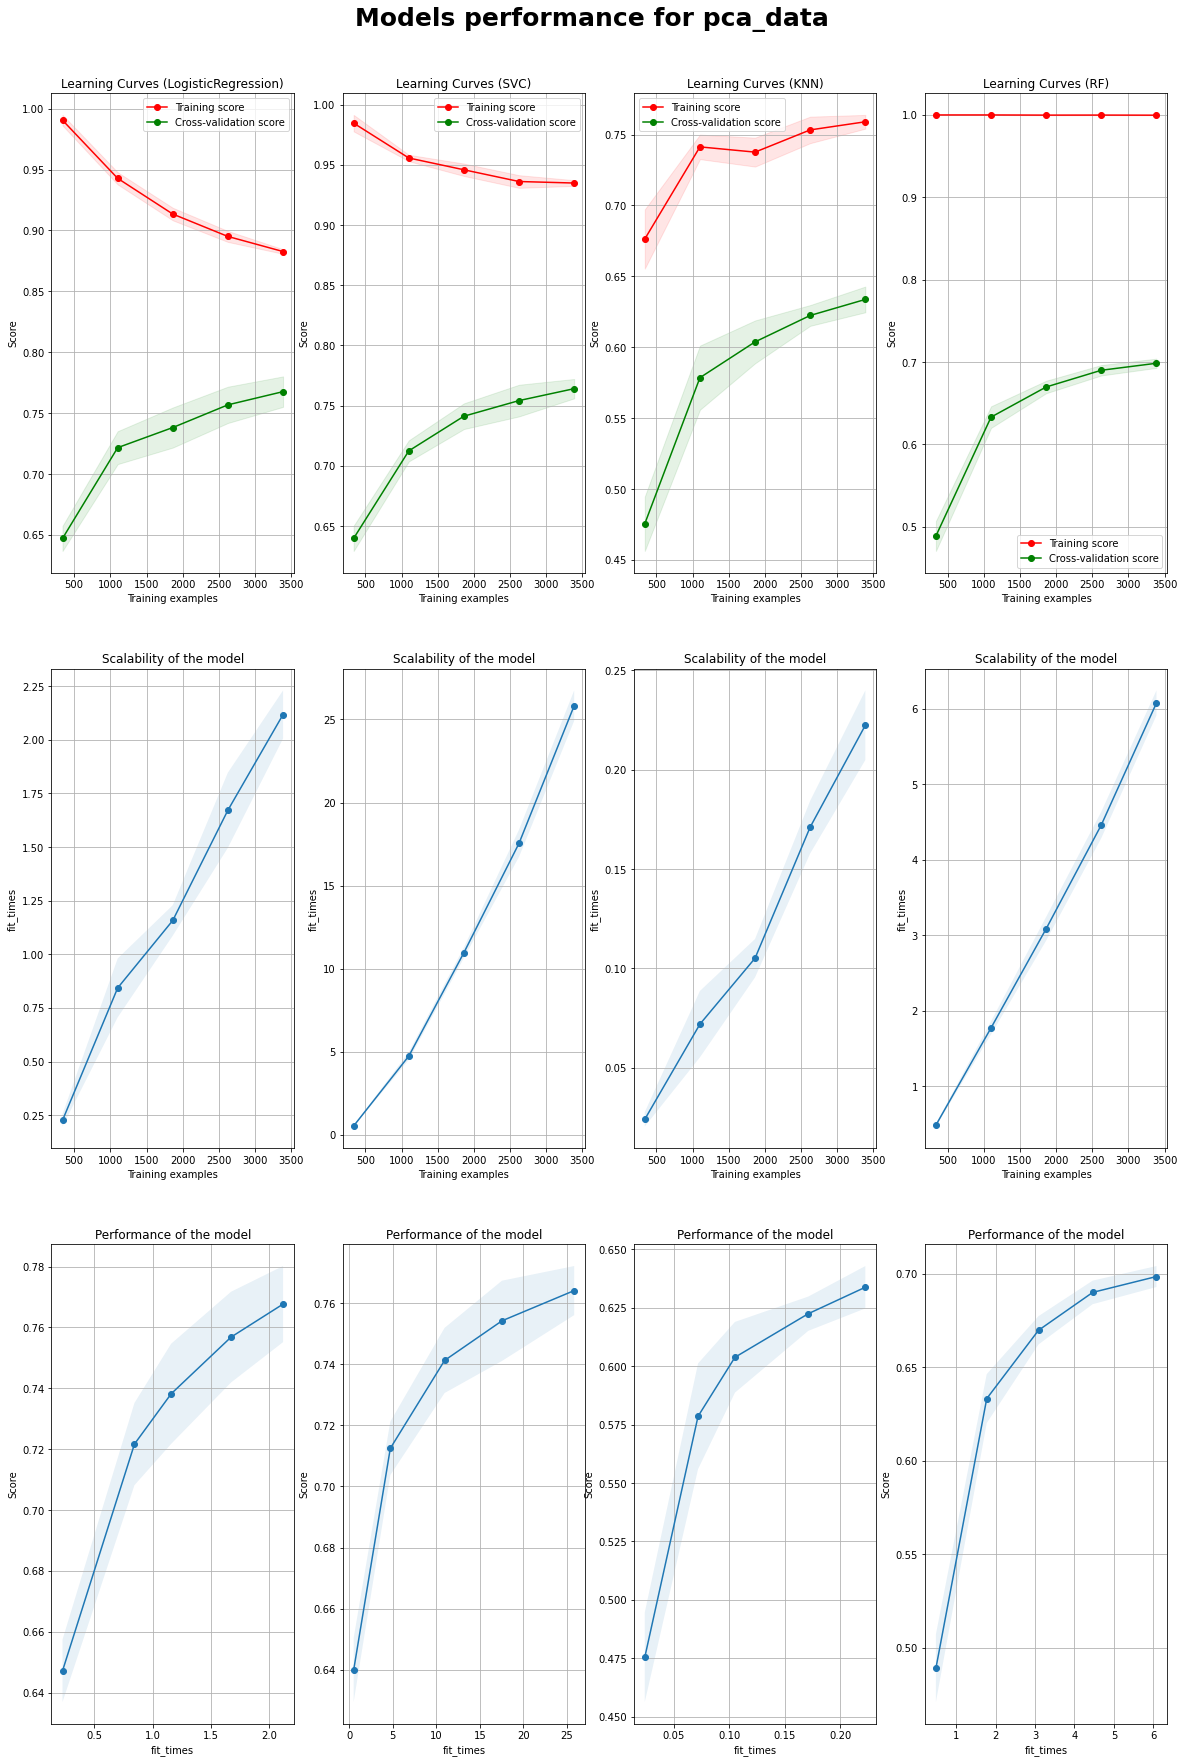

In [18]:
#This code is modified based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 4, figsize=(20, 30))

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

plot_learning_curve(clf_LogisticRegression, "Learning Curves (LogisticRegression)", X, y, axes=axes[:, 0],
                    cv=cv, n_jobs=4)

plot_learning_curve(clf_SVC,"Learning Curves (SVC)", X, y, axes=axes[:, 1],
                    cv=cv, n_jobs=4)

plot_learning_curve(clf_KNN, "Learning Curves (KNN)", X, y, axes=axes[:, 2],
                    cv=cv, n_jobs=4)

plot_learning_curve(clf_RF, "Learning Curves (RF)", X, y, axes=axes[:, 3],
                    cv=cv, n_jobs=4)
fig.suptitle('Models performance for pca_data',fontweight ="bold",fontsize=25,y=0.92)

plt.savefig('fig_pca_data.png')

In [19]:
#Using Max Voting for the classification Model integration
from sklearn.ensemble import VotingClassifier
model1 = clf_LogisticRegression
model2 = clf_SVC
model3 = clf_KNN
model4 = clf_RF
model = VotingClassifier(estimators=[('lr', model1), ('svc', model2),('knn', model3),('rf',model4)], voting='soft')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7724056603773585

In [20]:
#Using Max Voting for the classification Model integration
from sklearn.ensemble import VotingClassifier
model1 = clf_LogisticRegression
model2 = clf_SVC
model3 = clf_KNN
model4 = clf_RF
model = VotingClassifier(estimators=[('lr', model1), ('svc', model2),('knn', model3),('rf',model4)], voting='hard')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7523584905660378

In [21]:
#Using Stacking for the classification Model integration
from sklearn.ensemble import StackingClassifier
estimators = [
            ('rf', clf_RF),
            ('knn', clf_KNN),
            ('svc', clf_SVC)
 ]
clf = StackingClassifier(estimators=estimators, final_estimator=clf_LogisticRegression)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7582547169811321